# Importing Relevant Python Libraries

In [39]:
# Data Analysis and Wrangling
import pandas as pd
import numpy as np
import random as rnd
import math

# Visualization
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

# Machine Learning
from sklearn import linear_model
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split

# Extracting Data

In [40]:
list1 = pd.read_csv('listings.csv')
list2 = pd.read_csv('listings2.csv')

# Exploratory Data Analysis

In [43]:
#print(list1.columns.values)
print(list1.shape)

(3818, 16)


In [46]:
#list2.columns.values)
print(list2.shape)

(3818, 92)


In [47]:
# Join list1 and list2 to create the x vector
X = pd.concat([list1, list2], axis=1)
print(X.shape)
X.info(verbose = True, null_counts = True)

(3818, 108)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3818 entries, 0 to 3817
Data columns (total 108 columns):
id                                  3818 non-null int64
name                                3818 non-null object
host_id                             3818 non-null int64
host_name                           3498 non-null object
neighbourhood_group                 3818 non-null object
neighbourhood                       3818 non-null object
latitude                            3818 non-null float64
longitude                           3818 non-null float64
room_type                           3818 non-null object
price                               3818 non-null int64
minimum_nights                      3818 non-null int64
number_of_reviews                   3818 non-null int64
last_review                         3191 non-null object
reviews_per_month                   3191 non-null float64
calculated_host_listings_count      3818 non-null int64
availability_365            

In [7]:
Z1=X.loc[:, X.dtypes == np.float64] #Extracting columns with values of type float 
Z2=X.loc[:, X.dtypes == np.int64]   #Extracting columns with values of type int
Z3=X.loc[:, X.dtypes == np.object]   #Extracting columns with values of type int
X_numeric=pd.concat([Z1,Z2], axis=1)
X_cat = Z3


In [8]:
"""X_numeric has duplicate columns. The code below removes the duplicate columns"""
_, i = np.unique(X_numeric.columns, return_index=True)
X_Num_Cov=X_numeric.iloc[:, i]
print(X_Num_Cov.describe())
print(X_Num_Cov.columns.values)
X_Num_Cov.to_csv('Numerical_FS.csv')

       accommodates  availability_30  availability_365  availability_60  \
count   3818.000000      3818.000000       3818.000000      3818.000000   
mean       3.349398        16.786276        244.772656        36.814825   
std        1.977599        12.173637        126.772526        23.337541   
min        1.000000         0.000000          0.000000         0.000000   
25%        2.000000         2.000000        124.000000        13.000000   
50%        3.000000        20.000000        308.000000        46.000000   
75%        4.000000        30.000000        360.000000        59.000000   
max       16.000000        30.000000        365.000000        60.000000   

       availability_90    bathrooms     bedrooms         beds  \
count      3818.000000  3802.000000  3812.000000  3817.000000   
mean         58.082504     1.259469     1.307712     1.735394   
std          34.063845     0.590369     0.883395     1.139480   
min           0.000000     0.000000     0.000000     1.000000   

In [9]:
X_cat.head()
_, i = np.unique(X_cat.columns, return_index=True)
X_cat=X_cat.iloc[:, i]
print(X_cat.describe())
print(X_cat.info())
X_cat.to_csv('Catgorical_FS.csv')

       amenities  bed_type calendar_last_scraped calendar_updated  \
count       3818      3818                  3818             3818   
unique      3284         5                     1               34   
top           {}  Real Bed            2016-01-04            today   
freq          45      3657                  3818              706   

       cancellation_policy     city cleaning_fee        country country_code  \
count                 3818     3818         2788           3818         3818   
unique                   3        7          118              1            1   
top                 strict  Seattle       $50.00  United States           US   
freq                  1417     3810          310           3818         3818   

                                              description   ...    \
count                                                3818   ...     
unique                                               3742   ...     
top     Our space is a mix of a hostel and a h

In [10]:
X_select = X_Num_Cov[['accommodates','bathrooms','bedrooms','beds','guests_included','latitude','longitude','price']]
X_select = X_select.dropna()
Y = X_select['price']
X_select = X_select.drop(['price'], axis = 1)
print(X_select.info())
X_select

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3796 entries, 0 to 3817
Data columns (total 7 columns):
accommodates       3796 non-null int64
bathrooms          3796 non-null float64
bedrooms           3796 non-null float64
beds               3796 non-null float64
guests_included    3796 non-null int64
latitude           3796 non-null float64
longitude          3796 non-null float64
dtypes: float64(5), int64(2)
memory usage: 237.2 KB
None


,accommodates,bathrooms,bedrooms,beds,guests_included,latitude,longitude
0,4,1.0,1.0,1.0,2,47.636289,-122.371025
1,4,1.0,1.0,1.0,1,47.639123,-122.365666
2,11,4.5,5.0,7.0,10,47.629724,-122.369483
3,3,1.0,0.0,2.0,1,47.638473,-122.369279
4,6,2.0,3.0,3.0,6,47.632918,-122.372471
5,2,1.0,1.0,1.0,1,47.630525,-122.366174
6,2,1.0,1.0,1.0,1,47.636605,-122.368519
7,2,1.0,1.0,1.0,1,47.640161,-122.375856
8,2,1.0,1.0,1.0,1,47.632410,-122.357216
9,4,1.0,1.0,1.0,1,47.637492,-122.366889


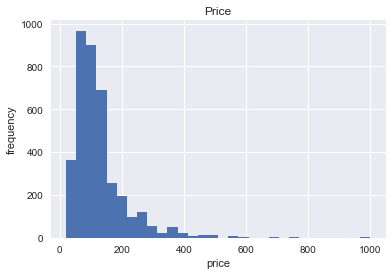

In [11]:
plt.hist(Y, bins=30)
plt.xlabel('price')
plt.ylabel('frequency')
plt.title("Price")

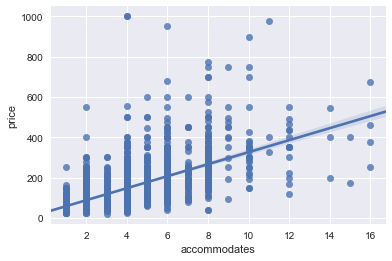

In [12]:
ax = sns.regplot(X_select['accommodates'], Y)

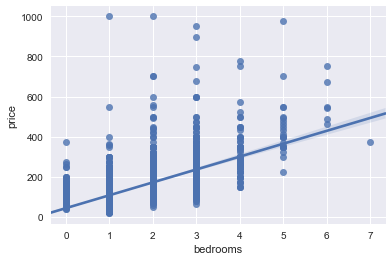

In [13]:
ax = sns.regplot(X_select['bedrooms'], Y)

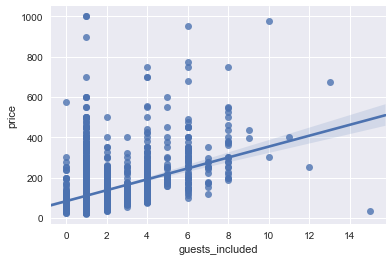

In [14]:
ax = sns.regplot(X_select['guests_included'], Y)

In [15]:
from mpl_toolkits.mplot3d import Axes3D
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
x = 
y = 
z = 
ax.scatter(X_select['latitude'], X_select['longitude'],Y, zdir='z', s=20, c=None, depthshade=True,)

SyntaxError: invalid syntax (<ipython-input-15-a63de4a85576>, line 4)

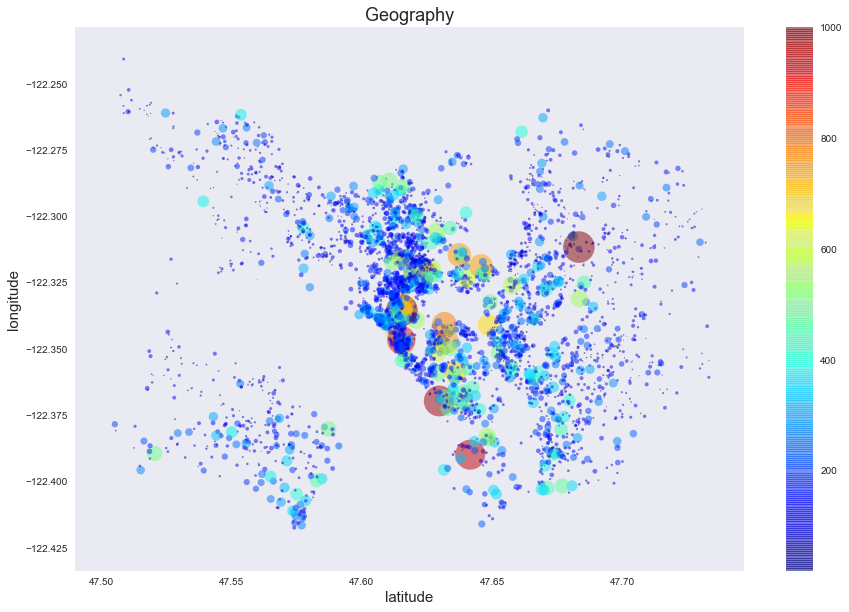

In [16]:
fig = plt.figure(figsize=(15,10))
ax = fig.add_subplot(1,1,1)
cm = plt.cm.get_cmap('jet')
sc = ax.scatter(X_select['latitude'],X_select['longitude'], s=Y**2/1000,c=Y,cmap=cm,linewidth=0,alpha=0.5)
ax.grid()
fig.colorbar(sc)
plt.xlabel('latitude',fontsize=15)
plt.ylabel('longitude',fontsize=15)
plt.title("Geography",fontsize=18)
plt.show()

# Splitting data into training and testing sets

In [17]:
num_test = 0.20
X_train, X_test, y_train, y_test = train_test_split(X_select, Y, test_size=num_test, random_state=100)

# Ridge regression

In [18]:
from sklearn.linear_model import Ridge
clf = Ridge(alpha=1.0)
clf.fit(X_train, y_train)

Ridge(alpha=1.0, copy_X=True, fit_intercept=True, max_iter=None,
   normalize=False, random_state=None, solver='auto', tol=0.001)

In [19]:
y_test_predict=clf.predict(X_test)
np.size(y_test_predict)

760

In [20]:
y_train_predict=clf.predict(X_train)
np.size(y_train_predict)

3036

In [21]:
from sklearn.metrics import mean_squared_error
from math import sqrt

rms_test = sqrt(mean_squared_error(y_test, y_test_predict))
rms_test

66.59886167293922

In [22]:
rms_train = sqrt(mean_squared_error(y_train, y_train_predict))
rms_train

64.2830836890096

In [23]:
clf.score(X_test, y_test)

0.4756814956809271

In [24]:
clf.score(X_train, y_train)

0.48982331040640054